# Explore molecular dynamics datasets retrieved from Zenodo

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Load data

In [10]:
records_df = pd.read_csv("zenodo_records.csv", index_col="id")
print(records_df.info(memory_usage="deep"))
records_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9898 entries, 3994120 to 1017210
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   conceptid     9898 non-null   int64 
 1   date_created  9898 non-null   object
 2   date_updated  9898 non-null   object
 3   title         9898 non-null   object
 4   description   9898 non-null   object
 5   access_right  9898 non-null   object
 6   license       9898 non-null   object
dtypes: int64(1), object(6)
memory usage: 20.6 MB
None


,conceptid,date_created,date_updated,title,description,access_right,license
id,,,,,,,
3994120,3769669,2020-08-21T08:29:25.541119+00:00,2020-08-21T12:59:23.565442+00:00,Atom coordinates for molecular dynamics,<p>Atom coordinates for molecular dynamics. Fo...,open,CC-BY-4.0
3676936,3676935,2020-02-20T15:31:03.462343+00:00,2020-02-21T07:20:55.837749+00:00,A1904 molecular dynamics trajectories data,<p>Molecular dynamics (MD) trajectories of wat...,open,CC-BY-4.0
3956408,3956407,2020-07-22T13:59:14.275412+00:00,2020-07-23T12:59:24.058110+00:00,"Complementary data to ""Molecular dynamics traj...",<p>Missing data from &quot;Molecular dynamics ...,open,CC-BY-4.0
4106362,4106361,2020-10-19T11:14:34.208998+00:00,2020-10-19T12:26:57.171108+00:00,Vibrational Spectra of a N719-Chromophore/Tita...,<p>A dye-sensitized solar cell was solvated by...,open,CC-BY-4.0
4632366,4632365,2021-03-23T21:29:35.435986+00:00,2021-03-24T00:27:31.798745+00:00,Molecular Dynamics Simulations of Water Format...,<p>Dataset support &quot;Molecular Dynamics Si...,open,CC-BY-4.0


In [11]:
files_df = pd.read_csv("zenodo_files.csv", index_col="record_id")
print(files_df.info(memory_usage="deep"))
files_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50353 entries, 3994120 to 1017210
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    50353 non-null  object
 1   type    50173 non-null  object
 2   size    50353 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 8.4 MB
None


,name,type,size
record_id,,,
3994120,amorphous_silica_1.data,data,47318077
3994120,amorphous_silica_1.zjson,zjson,405
3994120,ch_blob_10nm.data,data,1450543
3994120,vashishta_1990_like_amorphous_silica_amorphous...,in,2290
3994120,vashishta_1990_like_amorphous_silica_log.lammps,lammps,1659433


## Select 'interesting' file types

In [12]:
interest_df = files_df[ files_df["type"].isin(["mdp", "xtc", "pdb", "tpr", "trj"]) ]
interest_df.head()

,name,type,size
record_id,,,
267916,300ns_setup_I_all.pdb,pdb,65072770
267916,300ns_setup_II_all.pdb,pdb,65072454
3696800,COSAN-cis.pdb,pdb,3630
4509425,ptz_cbp_box.pdb,pdb,1169747
4509425,ptz_pyd2_box.pdb,pdb,1171923


## Number of files per file type

In [13]:
file_types = interest_df["type"].value_counts()

Text(0.5, 0, 'Number of files')

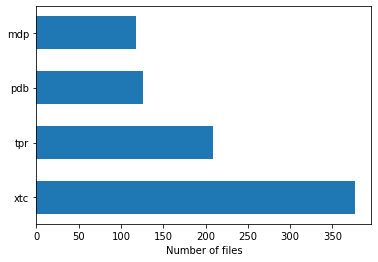

In [14]:
plt.barh(file_types.index, file_types.values, height=0.6)
plt.xlabel("Number of files")

## Average file size per file type (in Mo)

In [17]:
interest_df.groupby("type")["size"].mean()/(1024*1024)

type
mdp       0.005353
pdb     167.227174
tpr       2.000739
xtc    3523.631786
Name: size, dtype: float64